# Group Assignment Part 2 - Week 11

## Sentiment Analysis using Python

### Step 1: Install Required Libraries

In [59]:
#!pip install pandas nltk textblob seaborn matplotlib

### Step 2: Import Libraries and Load Data

In [60]:
import pandas as pd
import nltk
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Step 3: Import Dataset

In [61]:
df = pd.read_csv('Airline_Reviews.csv')
#df.head()

### Step 4: Data Preparation

In [62]:
# Drop rows where 'Review' is null
df = df.dropna(subset=['Review'])

In [63]:
# Convert review text to lowercase
df['Review'] = df['Review'].str.lower()

### Step 5: Download NLTK Library

In [64]:
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\gusta\AppData\Roaming\nltk_data...
[

### Step 6: Tokenize Review Text

In [65]:
stop_words = set(stopwords.words('english'))

# Define function to clean text
def clean_review(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalpha() and word not in stop_words])

### Step 7: Clean Review Text

In [66]:
df['Cleaned_Review'] = df['Review'].apply(clean_review)

### Step 8: Apply the Sentiment Analysis

In [67]:
# Define function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment function
df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

### Step 9: Categorize Sentiment

In [68]:
# Define function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization function
df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

### Step 10: Explore Sentiment Trends

C:\Users\gusta\AppData\Local\Temp\ipykernel_17608\2805947965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Category', palette='viridis')


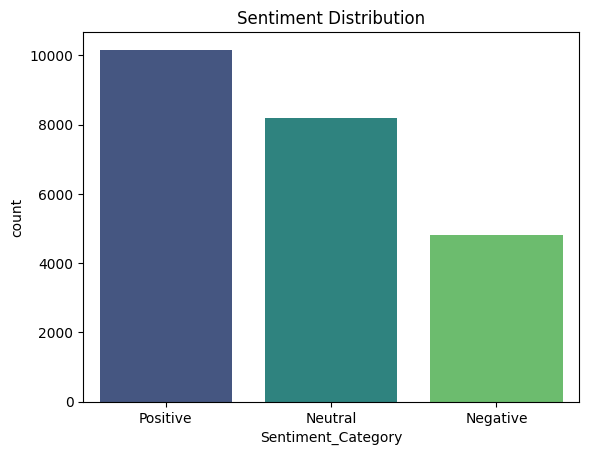

In [69]:
# Plot overall sentiment distribution
sns.countplot(data=df, x='Sentiment_Category', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

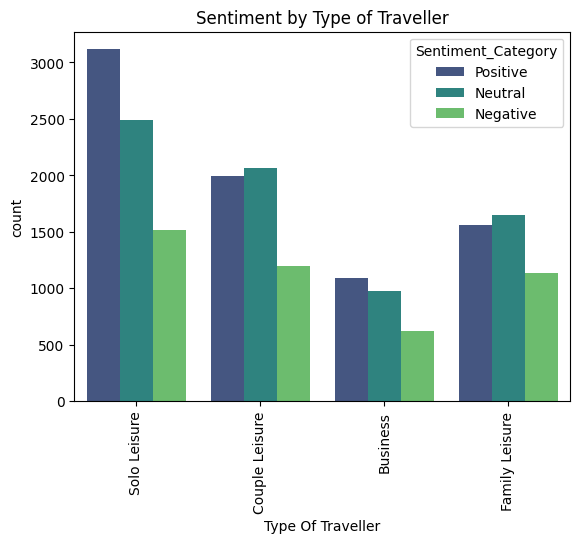

In [81]:
# Sentiment distribution by Type Of Traveller
sns.countplot(data=df, x='Type Of Traveller', hue='Sentiment_Category', palette='viridis')
plt.title('Sentiment by Type of Traveller')
plt.xticks(rotation=90)
plt.show()

### Step 11: Analyze Specific Aspects

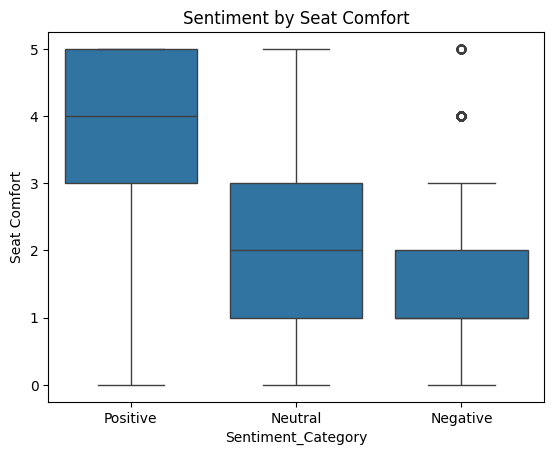

In [82]:
# Example: Relationship between Seat Comfort and Sentiment
sns.boxplot(data=df, x='Sentiment_Category', y='Seat Comfort')
plt.title('Sentiment by Seat Comfort')
plt.show()